In [1]:
# Rusul Al Busultan
import pandas as pd 
import matplotlib.pyplot as plt
from itertools import cycle, islice
import numpy as np

          Unnamed: 1 Unnamed: 2 Out of town Forgot to vote  \
T O T A L                 12810         6.1            3.7   

          Concerns about the coronavirus (COVID-19) pandemic  \
T O T A L                                                4.3   

          Illness or disability Not interested Too busy, conflicting schedule  \
T O T A L                    13           17.6                           13.1   

          Transportation problems Did not like candidates or campaign issues  \
T O T A L                     2.4                                       14.5   

          Registration problems Bad weather conditions  \
T O T A L                   4.9                    0.1   

          Inconvenient polling place Other reason Don't know or refused  
T O T A L                        2.6         14.5                   3.2  


c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


<AxesSubplot:title={'center':'Percentage of Reasons for not voting'}>

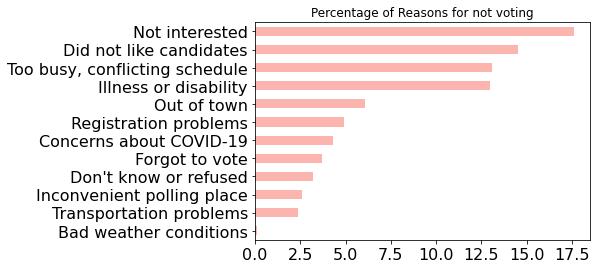

In [2]:
census_data_table_10=pd.read_excel('../US_census//table10.xlsx',skiprows=5,skipfooter=106,header=[0],index_col=[0]).fillna(method='ffill')
census_data_table_10.name='Reasons For Not Voting, By Selected Characteristics: November 2020'
census_data_table_10.head()
Update_col_names=census_data_table_10.columns
# for col in census_data_table_10.columns:
#     Update_col_names.append(' '.join(col))
Update_index_names= []
for ind in census_data_table_10.index:
    Update_index_names.append(' '.join(ind))
index_dic={map(Update_index_names,census_data_table_10.index)}
b=census_data_table_10.values[:,:]
census_data_table_10=pd.DataFrame(b,columns=Update_col_names,index=Update_index_names)
census_data_table_10.head()
census_data_table_10.drop(axis=1, columns='Unnamed: 2',)
print(census_data_table_10)
table10 = census_data_table_10.iloc[[0],[2,3,4,5,6,7,8,9,10,11,12,14]]
ttable10 = table10.rename(columns={'Concerns about the coronavirus (COVID-19) pandemic':'Concerns about COVID-19', "Did not like candidates or campaign issues":"Did not like candidates"})

fig,ax=plt.subplots()
ttable10 = ttable10.transpose()
# ax.bar(census_data_table_10.loc['Total'])
color = ['r','b','r','r','r','g','r','r','r','b','r','r','r']
ttable10.sort_values('T O T A L').plot(kind="barh",legend=False ,stacked=True, colormap='Pastel1',title="Percentage of Reasons for not voting", fontsize=16, ax=ax)
